<a href="https://colab.research.google.com/github/eunpro/academy/blob/main/rnn%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###RNN

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

sentences = ["i like dog", "i love coffee", "i hate milk", "you like cat", "you love milk", "you hate coffee"]
dtype = torch.float

"""
Word Processing
"""
word_list = list(set(" ".join(sentences).split()))
word_dict = {w: i for i, w in enumerate(word_list)}
number_dict = {i: w for i, w in enumerate(word_list)}
n_class = len(word_dict)


"""
TextRNN Parameter
"""
batch_size = len(sentences)
n_step = 2  # 학습 하려고 하는 문장의 길이 - 1
n_hidden = 5  # 은닉층 사이즈

def make_batch(sentences):
  input_batch = []
  target_batch = []

  for sen in sentences:
    word = sen.split()
    input = [word_dict[n] for n in word[:-1]]
    target = word_dict[word[-1]]

    input_batch.append(np.eye(n_class)[input])  # One-Hot Encoding
    target_batch.append(target)
  
  return input_batch, target_batch

input_batch, target_batch = make_batch(sentences)
input_batch = torch.tensor(input_batch, dtype=torch.float32, requires_grad=True)
target_batch = torch.tensor(target_batch, dtype=torch.int64)


"""
TextRNN
"""
class TextRNN(nn.Module):
  def __init__(self):
    super(TextRNN, self).__init__()

    self.rnn = nn.RNN(input_size=n_class, hidden_size=n_hidden, dropout=0.3)
    self.W = nn.Parameter(torch.randn([n_hidden, n_class]).type(dtype))
    self.b = nn.Parameter(torch.randn([n_class]).type(dtype))
    self.Softmax = nn.Softmax(dim=1)

  def forward(self, hidden, X):
    X = X.transpose(0, 1)
    outputs, hidden = self.rnn(X, hidden)
    outputs = outputs[-1]  # 최종 예측 Hidden Layer
    model = torch.mm(outputs, self.W) + self.b  # 최종 예측 최종 출력 층
    return model
	

"""
Training
"""
model = TextRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(500):
  hidden = torch.zeros(1, batch_size, n_hidden, requires_grad=True)
  output = model(hidden, input_batch)
  loss = criterion(output, target_batch)

  if (epoch + 1) % 100 == 0:
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

input = [sen.split()[:2] for sen in sentences]

hidden = torch.zeros(1, batch_size, n_hidden, requires_grad=True)
predict = model(hidden, input_batch).data.max(1, keepdim=True)[1]
print([sen.split()[:2] for sen in sentences], '->', [number_dict[n.item()] for n in predict.squeeze()])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Epoch: 0100 cost = 0.488777
Epoch: 0200 cost = 0.114255
Epoch: 0300 cost = 0.028630
Epoch: 0400 cost = 0.014167
Epoch: 0500 cost = 0.008748
[['i', 'like'], ['i', 'love'], ['i', 'hate'], ['you', 'like'], ['you', 'love'], ['you', 'hate']] -> ['dog', 'coffee', 'milk', 'cat', 'milk', 'coffee']


###LSTM

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

sentences = ["i like dog", "i love coffee", "i hate milk", "you like cat", "you love milk", "you hate coffee"]
dtype = torch.float


"""
TextLSTM
"""
class TextLSTM(nn.Module):
  def __init__(self):
    super(TextLSTM, self).__init__()

    self.lstm = nn.LSTM(input_size=n_class, hidden_size=n_hidden, dropout=0.3)
    self.W = nn.Parameter(torch.randn([n_hidden, n_class]).type(dtype))
    self.b = nn.Parameter(torch.randn([n_class]).type(dtype))
    self.Softmax = nn.Softmax(dim=1)

  def forward(self, hidden_and_cell, X):
    X = X.transpose(0, 1)
    outputs, hidden = self.lstm(X, hidden_and_cell)
    outputs = outputs[-1]  # 최종 예측 Hidden Layer
    model = torch.mm(outputs, self.W) + self.b  # 최종 예측 최종 출력 층
    return model
	

"""
Training
"""
model = TextLSTM()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(500):
  hidden = torch.zeros(1, batch_size, n_hidden, requires_grad=True)
  cell = torch.zeros(1, batch_size, n_hidden, requires_grad=True)
  output = model((hidden, cell), input_batch)
  loss = criterion(output, target_batch)

  if (epoch + 1) % 100 == 0:
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

input = [sen.split()[:2] for sen in sentences]

hidden = torch.zeros(1, batch_size, n_hidden, requires_grad=True)
cell = torch.zeros(1, batch_size, n_hidden, requires_grad=True)
predict = model((hidden, cell), input_batch).data.max(1, keepdim=True)[1]
print([sen.split()[:2] for sen in sentences], '->', [number_dict[n.item()] for n in predict.squeeze()])

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Epoch: 0100 cost = 0.319617
Epoch: 0200 cost = 0.035957
Epoch: 0300 cost = 0.012986
Epoch: 0400 cost = 0.007021
Epoch: 0500 cost = 0.004435
[['i', 'like'], ['i', 'love'], ['i', 'hate'], ['you', 'like'], ['you', 'love'], ['you', 'hate']] -> ['dog', 'coffee', 'milk', 'cat', 'milk', 'coffee']


###CNN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=1)
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, stride=1)
    self.fc1 = nn.Linear(10 * 12 * 12, 50)
    self.fc2 = nn.Linear(50, 10)
  
  def forward(self, x):
    print("연산 전", x.size())
    x = F.relu(self.conv1(x))
    print("conv1 연산 후", x.size())
    x = F.relu(self.conv2(x))
    print("conv2 연산 후",x.size())
    x = x.view(-1, 10 * 12 * 12)
    print("차원 감소 후", x.size())
    x = F.relu(self.fc1(x))
    print("fc1 연산 후", x.size())
    x = self.fc2(x)
    print("fc2 연산 후", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))  # Input Size: (10, 1, 20, 20)

###MNIST 코드 구현

In [4]:
pip install torchvision

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [6]:
train_data = datasets.MNIST('./data/', train=True, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])) # 학습 데이터
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=50, shuffle=True)

test_data = datasets.MNIST('./data/', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])) # 테스트 데이터
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=50, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = x.view(-1, 4 * 4 * 50) # [batch_size, 50, 4, 4]
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [8]:
cnn = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.01)

In [9]:
cnn.train()  # 학습을 위함
for epoch in range(10):
  for index, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()  # 기울기 초기화
    output = cnn(data)
    loss = criterion(output, target)
    loss.backward()  # 역전파
    optimizer.step()

    if index % 100 == 0:
      print("loss of {} epoch, {} index : {}".format(epoch, index, loss.item()))

loss of 0 epoch, 0 index : 2.2998366355895996
loss of 0 epoch, 100 index : 1.064387559890747
loss of 0 epoch, 200 index : 0.6707156300544739
loss of 0 epoch, 300 index : 0.3301559388637543
loss of 0 epoch, 400 index : 0.20118136703968048
loss of 0 epoch, 500 index : 0.37223193049430847
loss of 0 epoch, 600 index : 0.14898066222667694
loss of 0 epoch, 700 index : 0.24903585016727448
loss of 0 epoch, 800 index : 0.18513944745063782
loss of 0 epoch, 900 index : 0.201665997505188
loss of 0 epoch, 1000 index : 0.10182531177997589
loss of 0 epoch, 1100 index : 0.1020979955792427
loss of 1 epoch, 0 index : 0.08042660355567932
loss of 1 epoch, 100 index : 0.11442513763904572
loss of 1 epoch, 200 index : 0.12071928381919861
loss of 1 epoch, 300 index : 0.10174745321273804
loss of 1 epoch, 400 index : 0.27369993925094604
loss of 1 epoch, 500 index : 0.08963218331336975
loss of 1 epoch, 600 index : 0.06428360193967819
loss of 1 epoch, 700 index : 0.06577291339635849
loss of 1 epoch, 800 index : 0

In [10]:
cnn.eval()  # test case 학습 방지를 위함
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    output = cnn(data)
    test_loss += criterion(output, target).item() # sum up batch loss
    pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


Test set: Average loss: 5.6378, Accuracy: 9903/10000 (99%)



###lstm과 gru로 주식가격 예측

https://data-analysis-expertise.tistory.com/67#recentComments

In [12]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 12.8 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [13]:
import numpy as np
import pandas as pd
import yfinance as yf

In [14]:
amazon = yf.download('AMZN',
                    start='2014-01-01',
                    end='2019-12-31',
                    progress=False)
amazon

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500
...,...,...,...,...,...,...
2019-12-23,1788.260010,1793.000000,1784.510010,1793.000000,1793.000000,2136400
2019-12-24,1793.810059,1795.569946,1787.579956,1789.209961,1789.209961,881300
2019-12-26,1801.010010,1870.459961,1799.500000,1868.770020,1868.770020,6005400


In [17]:
#df 순서 변경
all_data = amazon[['Adj Close', 'Open', 'High', 'Low', 'Close', 'Volume']].round(2) #소수점 둘째자리 수 까지만
print(all_data.head())
all_data.info()

            Adj Close    Open    High     Low   Close   Volume
Date                                                          
2014-01-02     397.97  398.80  399.36  394.02  397.97  2137800
2014-01-03     396.44  398.29  402.71  396.22  396.44  2210200
2014-01-06     393.63  395.85  397.00  388.42  393.63  3170600
2014-01-07     398.03  395.04  398.47  394.29  398.03  1916000
2014-01-08     401.92  398.47  403.00  396.04  401.92  2316500
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2014-01-02 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1509 non-null   float64
 1   Open       1509 non-null   float64
 2   High       1509 non-null   float64
 3   Low        1509 non-null   float64
 4   Close      1509 non-null   float64
 5   Volume     1509 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 82.5 KB


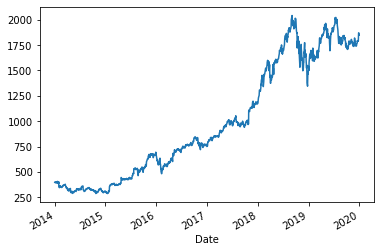

In [19]:
all_data['Adj Close'].plot()

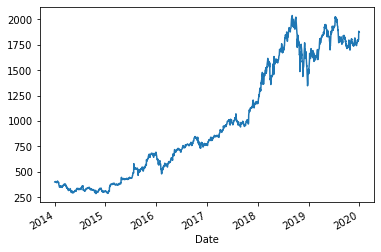

In [31]:
all_data['Open'].plot()

In [34]:
#2018년도를 training 데이터로 사용하여 학습한 모델을 2019년도를 test 데이터로 사용하여 성능 평가
print(all_data[:'2018'])
print(all_data[:'2018'].shape[0])
print(all_data[:'2019'])
print(all_data[:'2019'].shape[0])

            Adj Close     Open     High      Low    Close    Volume
Date                                                               
2014-01-02     397.97   398.80   399.36   394.02   397.97   2137800
2014-01-03     396.44   398.29   402.71   396.22   396.44   2210200
2014-01-06     393.63   395.85   397.00   388.42   393.63   3170600
2014-01-07     398.03   395.04   398.47   394.29   398.03   1916000
2014-01-08     401.92   398.47   403.00   396.04   401.92   2316500
...               ...      ...      ...      ...      ...       ...
2018-12-24    1343.96  1346.00  1396.03  1307.00  1343.96   7220000
2018-12-26    1470.90  1368.89  1473.16  1363.01  1470.90  10411800
2018-12-27    1461.64  1454.20  1469.00  1390.31  1461.64   9722000
2018-12-28    1478.02  1473.35  1513.47  1449.00  1478.02   8829000
2018-12-31    1501.97  1510.80  1520.76  1487.00  1501.97   6954500

[1258 rows x 6 columns]
1258
            Adj Close     Open     High      Low    Close   Volume
Date               

In [39]:
all_data[:2015].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2014-01-02 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1509 non-null   float64
 1   Open       1509 non-null   float64
 2   High       1509 non-null   float64
 3   Low        1509 non-null   float64
 4   Close      1509 non-null   float64
 5   Volume     1509 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 82.5 KB


In [43]:
def ts_train_set(all_data, time_steps, for_periods):
  #training & test set 생성
  ts_train = all_data[:'2018'].iloc[:,0:1].values #index기준으로 날짜 해당년도까지 가져옴
  ts_test = all_data[:'2019'].iloc[:,0:1].values
  ts_train_len = len(ts_train)
  ts_test_len = len(ts_test)

  X_train = []
  y_train = []
  y_train_stacked = []
  for i in range(time_steps, ts_train_len -1):
    X_train.append(ts_train[i-time_steps:i,0])
    print(ts_train[i-time_steps:i,0])
    y_train.append(ts_train[i:i*for_periods,0])
    print(ts_train[i:i*for_periods,0])
  
  #리스트를 numpy 배열로 만들기: array 배열의 연산속도가 더 빠르고 메모리 효율도 좋음
  X_train, y_train = np.array(X_train), np.array(y_train)  
  print(X_train, y_train)

  #3차원으로 재구성 np.reshape(samples, time_steps, features)로 맞춤
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

  inputs = pd.concat((all_data['Adj Close'][:'2018'], all_data['Adj Close']['2019':]), axis=0).values
  inputs = inputs[len(inputs)-len(ts_test)-time_steps:]
  inputs = inputs.reshape(-1,1)

  X_tr

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

###lstm활용한 삼성전자 주가예측

https://colab.research.google.com/github/teddylee777/machine-learning/blob/master/04-TensorFlow2.0/01-%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90-%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1/02-LSTM-stock-forecasting-with-LSTM-financedatareader.ipynb#scrollTo=2F4QQ1O_0l8m

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [46]:
!pip install finance-datareader

In [47]:
import FinanceDataReader as fdr

In [48]:
# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
samsung = fdr.DataReader('005930')

In [49]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-11-24,76000,76200,74100,74800,15652305,-0.006640
2021-11-25,75100,75100,73600,73700,12559258,-0.014706
2021-11-26,73500,74100,72000,72300,13002242,-0.018996
2021-11-29,71700,73000,71400,72300,16682559,0.000000
2021-11-30,73200,73900,70500,71300,29641025,-0.013831


In [50]:
# 삼성전자 주식코드: 005930
STOCK_CODE = '005930'
stock = fdr.DataReader(STOCK_CODE)
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-10-30,750,773,714,715,373530,NaN
1997-10-31,714,714,657,677,425381,-0.053147
1997-11-01,679,730,677,731,323800,0.079764
1997-11-03,782,788,736,788,863870,0.077975
1997-11-04,795,850,795,851,478162,0.079949


In [51]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-11-24,76000,76200,74100,74800,15652305,-0.006640
2021-11-25,75100,75100,73600,73700,12559258,-0.014706
2021-11-26,73500,74100,72000,72300,13002242,-0.018996
2021-11-29,71700,73000,71400,72300,16682559,0.000000
2021-11-30,73200,73900,70500,71300,29641025,-0.013831


In [52]:
stock.index

DatetimeIndex(['1997-10-30', '1997-10-31', '1997-11-01', '1997-11-03',
               '1997-11-04', '1997-11-05', '1997-11-06', '1997-11-07',
               '1997-11-08', '1997-11-10',
               ...
               '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-22',
               '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


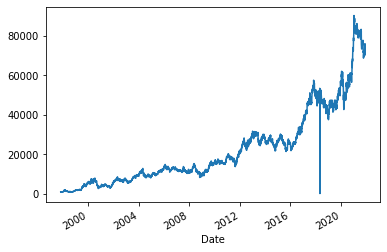

In [53]:
stock['Open'].plot()

Text(0, 0.5, 'price')

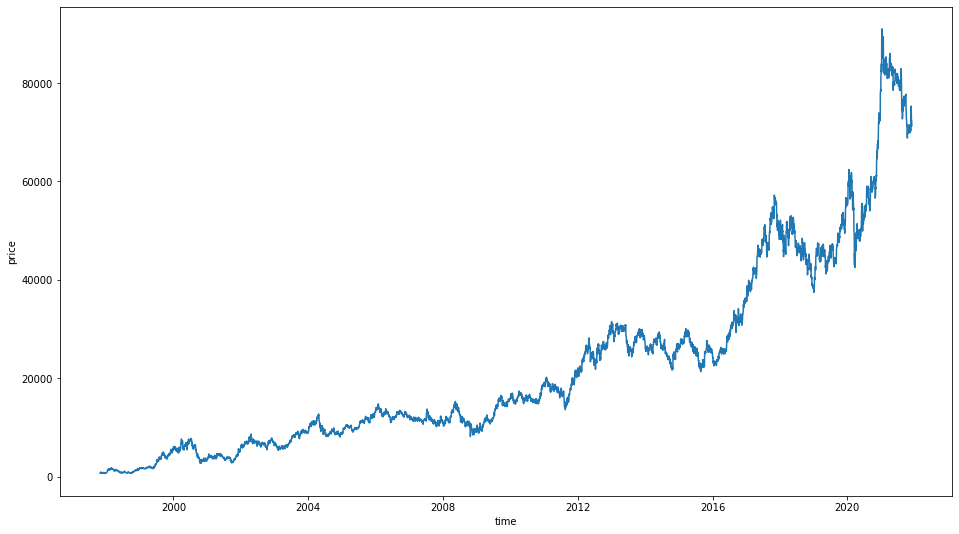

In [54]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


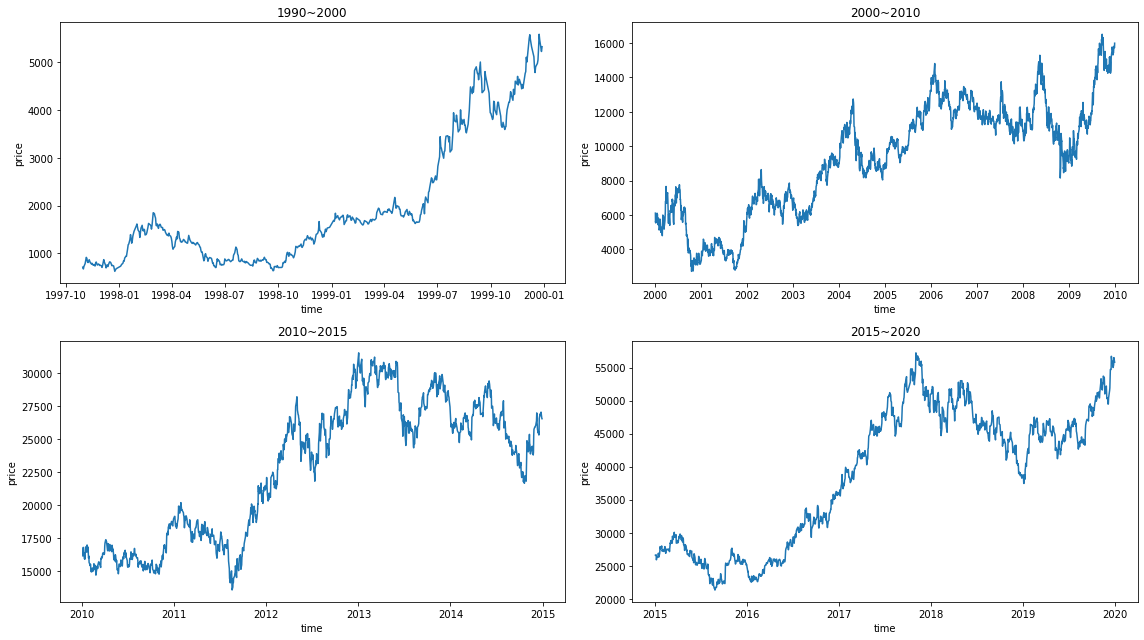

In [55]:
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[8.30564784e-03, 7.98553719e-03, 7.97765363e-03, 9.73742158e-04,
        4.13626191e-03],
       [7.90697674e-03, 7.37603306e-03, 7.34078212e-03, 5.53262589e-04,
        4.71043083e-03],
       [7.51937984e-03, 7.54132231e-03, 7.56424581e-03, 1.15078619e-03,
        3.58557975e-03],
       ...,
       [8.13953488e-01, 7.65495868e-01, 8.04469274e-01, 7.93079792e-01,
        1.43979542e-01],
       [7.94019934e-01, 7.54132231e-01, 7.97765363e-01, 7.93079792e-01,
        1.84733310e-01],
       [8.10631229e-01, 7.63429752e-01, 7.87709497e-01, 7.82014540e-01,
        3.28228101e-01]])

In [57]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [60]:
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [61]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [62]:
x_train

,Open,High,Low,Volume
0,0.008306,0.007986,0.007978,0.004136
1,0.007907,0.007376,0.007341,0.004710
2,0.007519,0.007541,0.007564,0.003586
3,0.008660,0.008140,0.008223,0.009566
4,0.008804,0.008781,0.008883,0.005295
...,...,...,...,...
4795,0.404208,0.377273,0.403352,0.001765
4796,0.399336,0.372521,0.397095,0.002429
4797,0.400664,0.376446,0.402682,0.001967
4798,0.405316,0.387397,0.408492,0.002922


In [63]:
import tensorflow as tf
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [64]:
WINDOW_SIZE=20
BATCH_SIZE=32
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [65]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [67]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [68]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [69]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
    150/Unknown - 5s 14ms/step - loss: 6.3971e-05 - mse: 1.2794e-04
Epoch 00001: val_loss improved from inf to 0.00453, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 7s 25ms/step - loss: 6.3971e-05 - mse: 1.2794e-04 - val_loss: 0.0045 - val_mse: 0.0091
Epoch 2/50
149/150 [============================>.] - ETA: 0s - loss: 2.3727e-05 - mse: 4.7455e-05
Epoch 00002: val_loss improved from 0.00453 to 0.00404, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 3s 16ms/step - loss: 2.3715e-05 - mse: 4.7429e-05 - val_loss: 0.0040 - val_mse: 0.0081
Epoch 3/50
149/150 [============================>.] - ETA: 0s - loss: 2.2239e-05 - mse: 4.4478e-05
Epoch 00003: val_loss improved from 0.00404 to 0.00393, saving model to tmp/ckeckpointer.ckpt
150/150 [==============================] - 3s 17ms/step - loss: 2.2261e-05 - mse: 4.4522e-05 - val_loss: 0.0039 - val_mse: 0.0079
Epoch 4/50
150/150 [==============================] - E

In [70]:
model.load_weights(filename)

In [ ]:
pred = model.predict(test_data)

In [ ]:
pred.shape

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

###MANY2MANY: n개의 input 투입하여 m개의 output생성